# Parte 1: Importar datos y crear DataFrame inicial

Primero importamos librerias y datos.

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv('/gdrive/Shareddrives/Proyecto Minería de Datos/Entrega 3/8_pilars.txt', on_bad_lines='skip', header = 0, encoding='windows-1252', sep=";").drop_duplicates()

# Parte 2: Normalización

Normalizamos los datos.

In [4]:
df

,ticker,pilar_1,pilar_2,pilar_3,pilar_4,pilar_5,pilar_6,pilar_7,pilar_8
0,A,10.071314,0.564917,0.413014,0.769006,-0.055901,0.786742,0.817672,8.784400
1,AAL,-1.564597,-0.260087,-0.292013,-2.038562,0.316563,-5.425304,-1.237979,-0.907841
2,AAP,5.792467,0.321705,0.078147,0.036837,-0.069036,1.663705,0.707547,5.121425
3,AAPL,6.983377,1.811085,0.595823,0.958181,-0.199708,0.477544,0.829675,6.471970
4,ABBV,7.331589,0.800825,0.991671,1.174044,0.110673,1.299938,1.331672,3.481938
...,...,...,...,...,...,...,...,...,...
461,YUM,5.364047,1.821682,0.120109,0.175373,-0.129683,2.395996,1.073034,6.618045
462,ZBH,7.742940,0.334727,0.001547,-0.778586,0.025260,1.108418,-0.069480,3.315824
463,ZBRA,5.304121,0.890773,0.511822,48.235294,0.007914,0.389070,1.359813,3.350047
464,ZION,1.966060,0.396106,0.120353,0.907095,-0.184479,0.301460,-0.442688,2.319213


In [5]:
df_tickers = df[['ticker']]

In [6]:
scaler = MinMaxScaler()
df = df.drop(['ticker'], axis=1)
df_n=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_n['ticker'] = df_tickers
df_n.head()

,pilar_1,pilar_2,pilar_3,pilar_4,pilar_5,pilar_6,pilar_7,pilar_8,ticker
0,0.303793,0.315459,0.188552,0.492561,0.153546,0.323928,0.406547,0.436306,A
1,0.230432,0.075505,0.094473,0.462546,0.301622,0.241785,0.389654,0.353451,AAL
2,0.276816,0.244720,0.143867,0.484733,0.148324,0.335524,0.405642,0.404993,AAP
3,0.284324,0.677909,0.212946,0.494583,0.096374,0.319839,0.406646,0.416538,AAPL
4,0.286520,0.384073,0.265768,0.496891,0.219769,0.330714,0.410771,0.390977,ABBV


Se decidio normalizar nuestros datos con una escala de Mínimo-Máximo, por lo que todos los valores de los 8 pilares se encuentran en un rango entre 0 y 1, con la intención de que todos los datos tengan resultados representativos.

# Parte 3: Análisis varianza y pilares importantes

Vemos las caracteristicas de las columnas

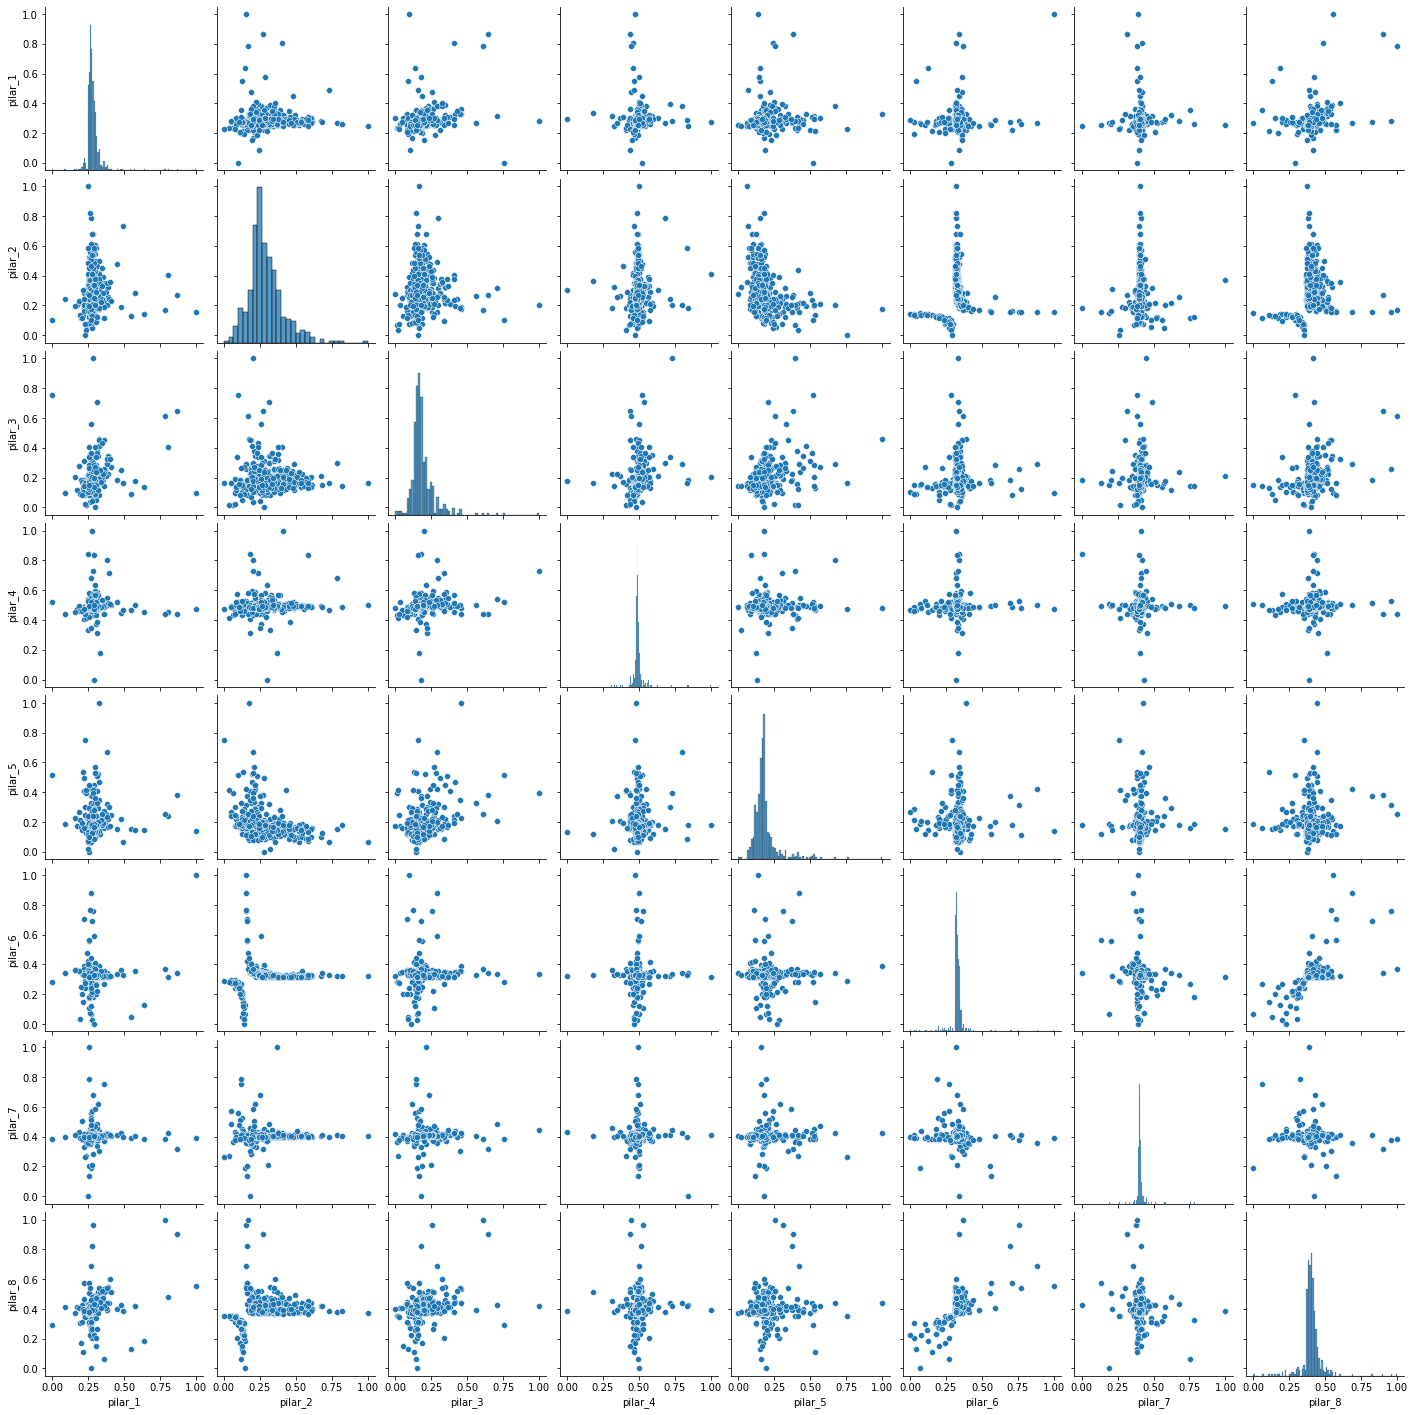

In [7]:
pairwise_plot = sns.pairplot(df_n[['pilar_1', 'pilar_2', 'pilar_3', 'pilar_4', 'pilar_5', 'pilar_6', 'pilar_7', 'pilar_8']])

In [8]:
df_statistics = df_n[['pilar_1', 'pilar_2', 'pilar_3', 'pilar_4', 'pilar_5', 'pilar_6', 'pilar_7', 'pilar_8']].describe(percentiles=[.5])
display(df_statistics)

,pilar_1,pilar_2,pilar_3,pilar_4,pilar_5,pilar_6,pilar_7,pilar_8
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.00000,466.000000
mean,0.285878,0.291536,0.189362,0.494029,0.186275,0.329866,0.40678,0.405518
std,0.070877,0.121920,0.089354,0.055401,0.093332,0.076178,0.05479,0.077681
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.274452,0.269393,0.169457,0.489827,0.170002,0.327991,0.40408,0.401750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


Se distingue que la mayor parte de la varianza se encuentra en los pilares 2, 3 y 5.

# Parte 4: PCA

In [9]:
pca = PCA(n_components = 2)
components_pca = pca.fit_transform(df_n[['pilar_1', 'pilar_2', 'pilar_3', 'pilar_4', 'pilar_5', 'pilar_6', 'pilar_7', 'pilar_8']])
sum(pca.explained_variance_ratio_)

0.5542504344407024

Podemos ver que la varianza explicada en los dos primeros componentes del PCA es cercana al 50%. Debido a este bajo porcentaje se decide utilizar menos pilares en el pca con los criterios de varianza y de parametros financieros en las variables.

Se deciden utilizar los pilares 2, 3, 5 y 8 debido a que estos cuatro tienen en consideración la deuda de las empresas, su cash flow, revenue, emisión de acciones y market cap. Todas las variables se encuentran ya en estos 4 pilares, por lo que los demás pasan a ser rebundantes. Además son los pilares con mayor varianza.

In [10]:
pca = PCA(n_components = 2)
components_pca = pca.fit_transform(df_n[['pilar_2', 'pilar_3', 'pilar_5', 'pilar_8']])
sum(pca.explained_variance_ratio_)

0.7541055148459801

Podemos ver que ahora con 2 componentes se explica más del 70% de la varianza, lo que es un número razonable.

In [11]:
df_pca = pd.DataFrame(data=components_pca)

In [12]:
df_pca

,0,1
0,0.037007,0.007617
1,-0.226980,-0.119687
2,-0.014722,-0.065392
3,0.372484,0.122717
4,0.050949,0.095551
...,...,...
461,0.372168,0.090570
462,-0.028054,-0.062358
463,0.103531,0.041610
464,0.024600,-0.083069


# Parte 4: Número de clusters

Encontraremos el número óptimo de grupos con el método Elbow.

In [13]:
K = range(1,12)
wss = []
for k in K:
  kmeans = KMeans(n_clusters=k, init="k-means++")
  kmeans=kmeans.fit(df_n[['pilar_2', 'pilar_3', 'pilar_5', 'pilar_8']])
  wss_iter = kmeans.inertia_
  wss.append(wss_iter)

In [14]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,17.481055
1,2,13.158255
2,3,9.747734
3,4,8.108723
4,5,7.068289
5,6,6.127699
6,7,5.428292
7,8,4.723944
8,9,4.392017
9,10,4.007910


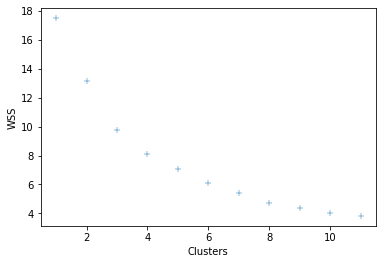

In [15]:
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker = '+')

Podemos ver que en el número 5 los puntos comienza a tener menos cambios 

Ahora tratamos de realizar un Silhouette Method para estar seguros del número de clusters

In [16]:
for i in range(2, 9):
  labels = KMeans(n_clusters=i, init="k-means++", random_state=1863955).fit(df_n[['pilar_2', 'pilar_3', 'pilar_5', 'pilar_8']]).labels_
  print('Silhouette score for k(clusters) = '+str(i)+' is '+str(silhouette_score(df_n[['pilar_2', 'pilar_3', 'pilar_5', 'pilar_8']], labels, metric='euclidean', sample_size=1500, random_state = 1863955)))

Silhouette score for k(clusters) = 2 is 0.2865625875019962
Silhouette score for k(clusters) = 3 is 0.34530552426107236
Silhouette score for k(clusters) = 4 is 0.40532303243594053
Silhouette score for k(clusters) = 5 is 0.4124128468082958
Silhouette score for k(clusters) = 6 is 0.29490622259130905
Silhouette score for k(clusters) = 7 is 0.286903921684372
Silhouette score for k(clusters) = 8 is 0.3010495297861177


Vemos que el valor más cercano a 1 se da en 5 clusters, por lo que es el óptimo.

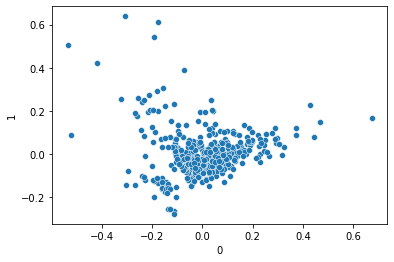

In [17]:
sns.scatterplot(data=df_pca, x=0, y=1)

# Parte 5: Clusters

## K-Means:

In [18]:
kmeans = KMeans(n_clusters=5, random_state = 1863955)
cluster_kmeans = kmeans.fit(df_n[['pilar_2', 'pilar_3', 'pilar_5', 'pilar_8']])
labels_kmeans = cluster_kmeans.labels_
print(silhouette_score(df_n[['pilar_2', 'pilar_3', 'pilar_5', 'pilar_8']], labels_kmeans))

0.41241284680829576


In [19]:
df_pca_km = df_pca
df_pca_km['label'] = labels_kmeans

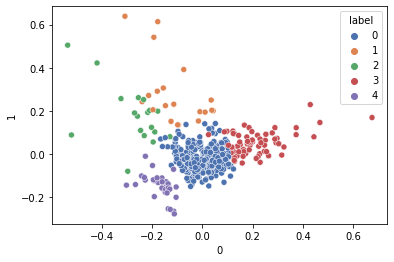

In [20]:
sns.scatterplot(data=df_pca_km, x=0, y=1, hue="label", palette='deep')

## MiniBatch K-Means:

In [21]:
from sklearn.cluster import MiniBatchKMeans

In [22]:
mkmeans_5 = MiniBatchKMeans(n_clusters=5, random_state = 1863955)
cluster_mk = mkmeans_5.fit(df_n[['pilar_2', 'pilar_3', 'pilar_5', 'pilar_8']])
labels_mk_5 = cluster_mk.labels_
print(silhouette_score(df_n[['pilar_2', 'pilar_3', 'pilar_5', 'pilar_8']], labels_mk_5))

0.28528898920562956


In [23]:
df_pca_mk = df_pca
df_pca_mk['label'] = labels_mk_5

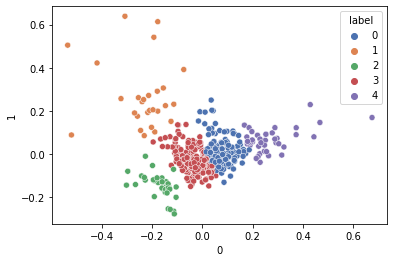

In [24]:
sns.scatterplot(data=df_pca_mk, x=0, y=1, hue="label", palette='deep')

## GMM:

In [25]:
from sklearn.mixture import GaussianMixture

In [26]:
def clusterize(x, pca, n, r):
    gm = GaussianMixture(n_components=n, random_state=r)
    label = gm.fit_predict(x)
    pca['label'] = label
    return pca

In [27]:
df_gmm = clusterize(x=df_n[['pilar_2', 'pilar_3', 'pilar_5', 'pilar_8']], pca=df_pca, n=5, r=18639550)

In [28]:
gm = GaussianMixture(n_components=5, random_state=18639550)
print ("gmm: silhouttte: ", silhouette_score(df_n[['pilar_2', 'pilar_3', 'pilar_5', 'pilar_8']], gm.fit_predict(df_n[['pilar_2', 'pilar_3', 'pilar_5', 'pilar_8']])))

gmm: silhouttte:  0.2826617842065334


Text(0.5, 1.0, 'Acciones agrupadas por GMM n=5')

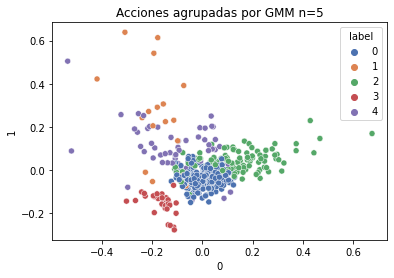

In [29]:
sns.scatterplot(data = df_gmm,
                x = 0,
                y = 1,
                hue=df_gmm['label'],
                palette="deep").set_title('Acciones agrupadas por GMM n=5')

## DBSCAN

In [30]:
from sklearn.cluster import DBSCAN

In [31]:
df_pca.drop('label', inplace=True, axis=1)

In [32]:
df_dbscan = df_pca

In [33]:
dbscan = DBSCAN(eps=0.05, min_samples=10).fit(df_n[['pilar_2', 'pilar_3', 'pilar_5', 'pilar_8']])
labels_dbscan = dbscan.labels_
labels_dic = {"label": labels_dbscan}
labels_pd = pd.DataFrame(labels_dic)
df_dbscan = pd.concat([df_dbscan, labels_pd], axis=1)
df_dbscan

,0,1,label
0,0.037007,0.007617,0
1,-0.226980,-0.119687,-1
2,-0.014722,-0.065392,0
3,0.372484,0.122717,-1
4,0.050949,0.095551,-1
...,...,...,...
461,0.372168,0.090570,-1
462,-0.028054,-0.062358,0
463,0.103531,0.041610,0
464,0.024600,-0.083069,0


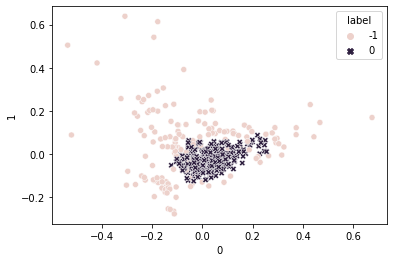

In [34]:
sns.scatterplot(data=df_dbscan, x=0, y=1, hue="label", style="label")

In [35]:
print(silhouette_score(df_n[['pilar_2', 'pilar_3', 'pilar_5', 'pilar_8']], labels_dbscan))

0.2948638251137764


# Parte 6: Análisis

Débido a que K-Means presento el mejor Silhouette Score, se decidio realizar el análisis con esta técnica de clustering. 

## K-Means (Mejor método)

In [36]:
df_n_kmeans = df_n
df_n_kmeans['label'] = labels_kmeans

In [37]:
df_n_kmeans['label'].value_counts()

0    321
3     70
4     37
1     20
2     18
Name: label, dtype: int64

In [38]:
df_p = df_n_kmeans.groupby(['label']).mean()
df_p

,pilar_1,pilar_2,pilar_3,pilar_4,pilar_5,pilar_6,pilar_7,pilar_8
label,,,,,,,,
0,0.280454,0.273127,0.175532,0.490694,0.167518,0.342826,0.404705,0.411484
1,0.397046,0.255881,0.441459,0.527189,0.273629,0.399434,0.400556,0.580470
2,0.270376,0.190475,0.299430,0.498082,0.534326,0.328163,0.405190,0.387113
3,0.284280,0.508369,0.178881,0.505342,0.142229,0.322368,0.405675,0.404745
4,0.283403,0.109455,0.139363,0.481661,0.215786,0.194843,0.431007,0.269599




*   Grupo 0: **Acciones promedio**. Crecimiento relativamente bajo, poca emisión de acciones, deuda relativamente baja. 
*   Grupo 1: **Crecimiento**. Tienen un Marketcap muy alto en relación a sus utilidades y free cash flow, un gran crecimiento en los ingresos y utilidades pero una deuda a largo plazo elevada en comparación a el free cash flow. 
*   Grupo 2:**Diluidor** Poca deuda en comparación al free cash flow. Mayor crecimiento de los ingresos que utilidades. Alta emisión de nuevas acciones. 
*   Grupo 3:**Retornos en capital invertido** Dan un muy buen retorno por el capital invertido, pero los ingresos no crecen mucho. Emiten pocas acciones.
*   Grupo 4: **Cash Maker**. Muy baja deuda. Crecimiento bajo en utilidades y ingresos (más bajo en ingresos). Gran crecimiento en el free cashflow. Malos retornos en el capital invertido.


In [39]:
df_SP500 = pd.read_csv('/gdrive/Shareddrives/Proyecto Minería de Datos/Datos/sp500_companies.csv')

In [40]:
df_SP500.rename(columns={'Symbol':'ticker'}, inplace=True)

In [41]:
df_completo_kmeans = pd.merge(df_n, df_SP500, on='ticker')

In [42]:
df_completo_kmeans

,pilar_1,pilar_2,pilar_3,pilar_4,pilar_5,pilar_6,pilar_7,pilar_8,ticker,label,...,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,0.303793,0.315459,0.188552,0.492561,0.153546,0.323928,0.406547,0.436306,A,0,...,136.08,40285257728,1.922000e+09,0.083,Santa Clara,CA,United States,17700.0,"Agilent Technologies, Inc. provides applicatio...",0.001203
1,0.230432,0.075505,0.094473,0.462546,0.301622,0.241785,0.389654,0.353451,AAL,4,...,14.11,9170102272,2.400000e+09,0.501,Fort Worth,TX,United States,129700.0,"American Airlines Group Inc., through its subs...",0.000274
2,0.276816,0.244720,0.143867,0.484733,0.148324,0.335524,0.405642,0.404993,AAP,0,...,181.07,10885603328,1.059585e+09,0.006,Raleigh,NC,United States,41000.0,"Advance Auto Parts, Inc. provides automotive r...",0.000325
3,0.284324,0.677909,0.212946,0.494583,0.096374,0.319839,0.406646,0.416538,AAPL,3,...,138.38,2201362890752,1.305410e+11,0.081,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.065735
4,0.286520,0.384073,0.265768,0.496891,0.219769,0.330714,0.410771,0.390977,ABBV,0,...,145.28,256869564416,3.021200e+10,0.033,North Chicago,IL,United States,50000.0,"AbbVie Inc. discovers, develops, manufactures,...",0.007670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,0.274115,0.680991,0.149467,0.486214,0.124213,0.345207,0.408646,0.417786,YUM,3,...,121.78,35697733632,2.258000e+09,0.041,Louisville,KY,United States,36000.0,"YUM! Brands, Inc., together with its subsidiar...",0.001066
462,0.289113,0.248507,0.133646,0.476016,0.185812,0.328181,0.399257,0.389557,ZBH,0,...,104.85,21904003072,2.366200e+09,0.039,Warsaw,IN,United States,19500.0,"Zimmer Biomet Holdings, Inc., together with it...",0.000654
463,0.273737,0.410234,0.201737,1.000000,0.178916,0.318669,0.411003,0.389850,ZBRA,3,...,230.56,12321472512,1.149000e+09,0.063,Lincolnshire,IL,United States,9800.0,"Zebra Technologies Corporation, together with ...",0.000368
464,0.252692,0.266360,0.149499,0.494037,0.102428,0.317511,0.396190,0.381038,ZION,0,...,49.76,7785598976,NaN,-0.180,Salt Lake City,UT,United States,9895.0,"Zions Bancorporation, National Association pro...",0.000232


In [43]:
for i in [0, 1, 2, 3, 4]:
  print(f'\n Grupo {i} ')
  x = df_completo_kmeans.loc[df_completo_kmeans['label']==i].Sector.value_counts()
  print(x)
  a = x.plot.bar


 Grupo 0 
Financial Services        52
Industrials               51
Healthcare                47
Consumer Cyclical         35
Technology                32
Real Estate               28
Consumer Defensive        27
Energy                    16
Basic Materials           15
Communication Services    15
Utilities                  3
Name: Sector, dtype: int64

 Grupo 1 
Technology            8
Healthcare            4
Consumer Cyclical     3
Energy                2
Utilities             1
Financial Services    1
Real Estate           1
Name: Sector, dtype: int64

 Grupo 2 
Industrials           5
Energy                3
Technology            3
Basic Materials       3
Healthcare            1
Real Estate           1
Utilities             1
Financial Services    1
Name: Sector, dtype: int64

 Grupo 3 
Technology                22
Consumer Cyclical         12
Financial Services        11
Industrials               10
Healthcare                 9
Consumer Defensive         5
Communication Services

In [44]:
df_pca_industrias = df_pca_km
df_pca_industrias['label'] = df_completo_kmeans['Sector']

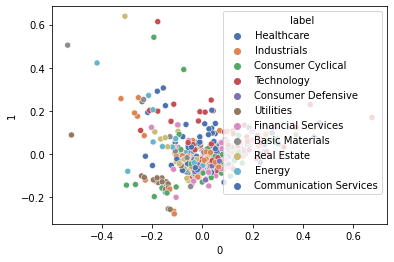

In [45]:
sns.scatterplot(data=df_pca_industrias, x=0, y=1, hue="label", palette='deep')

In [46]:
for i in [0, 1, 2, 3, 4]:
  print(f'\n Grupo {i} ')
  print(df_completo_kmeans.loc[df_completo_kmeans['label']==i].ticker)


 Grupo 0 
0         A
2       AAP
4      ABBV
6      ABMD
7       ABT
       ... 
459    XRAY
460     XYL
462     ZBH
464    ZION
465     ZTS
Name: ticker, Length: 321, dtype: object

 Grupo 1 
31     AMZN
86       CI
105     CRM
110    CTLT
135    DXCM
145    ENPH
147    EPAM
154    ETSY
155    EVRG
287    MPWR
307     NOW
313    NVDA
321     OKE
327    PAYC
354     PXD
376    SEDG
379    SIVB
415    TSLA
432    VICI
437    VRTX
Name: ticker, dtype: object

 Grupo 2 
61      BKR
96      CNC
126     DLR
134     DXC
149     EQT
162    FANG
170     FIS
171    FISV
189     GPN
216     IFF
225      IR
251     LHX
252     LIN
301     NEM
330     PCG
372     RTX
404     TFC
441     WAB
Name: ticker, dtype: object

 Grupo 3 
3      AAPL
5       ABC
8       ACN
9      ADBE
12      ADP
       ... 
403     TER
419     TXN
442     WAT
461     YUM
463    ZBRA
Name: ticker, Length: 70, dtype: object

 Grupo 4 
1       AAL
11      ADM
13      AEE
14      AEP
16      AIG
20      ALB
41      ATO
46  

In [53]:
lista = []
for i in df_completo_kmeans.loc[df_completo_kmeans['label']==4].ticker:
  lista.append(i)
print(lista)
print("List in proper method", '[%s]'%', '.join(map(str, lista)))


['AAL', 'ADM', 'AEE', 'AEP', 'AIG', 'ALB', 'ATO', 'AWK', 'BA', 'CCL', 'CMS', 'D', 'DTE', 'ED', 'EIX', 'ES', 'ETR', 'EXC', 'FE', 'GM', 'GS', 'HES', 'HWM', 'KMX', 'NCLH', 'NFLX', 'NI', 'PEG', 'PNW', 'PPL', 'RCL', 'SO', 'SRE', 'TMUS', 'UAL', 'WYNN', 'XEL']
List in proper method [AAL, ADM, AEE, AEP, AIG, ALB, ATO, AWK, BA, CCL, CMS, D, DTE, ED, EIX, ES, ETR, EXC, FE, GM, GS, HES, HWM, KMX, NCLH, NFLX, NI, PEG, PNW, PPL, RCL, SO, SRE, TMUS, UAL, WYNN, XEL]


## MiniBatch (Descartado)

In [ ]:
df_n_mk = df_n
df_n_mk['label'] = labels_mk_5

In [ ]:
df_n_mk['label'].value_counts()

3    224
0    137
4     40
2     38
1     27
Name: label, dtype: int64

In [ ]:
df_p = df_n_mk.groupby(['label']).mean()
df_p

,pilar_1,pilar_2,pilar_3,pilar_4,pilar_5,pilar_6,pilar_7,pilar_8
label,,,,,,,,
0,0.286402,0.361167,0.189715,0.492041,0.155612,0.323379,0.409171,0.411180
1,0.330952,0.199782,0.399934,0.521993,0.447774,0.387832,0.400934,0.505865
2,0.281637,0.110187,0.139177,0.481235,0.224191,0.193662,0.429853,0.265343
3,0.280992,0.241292,0.174071,0.491777,0.177593,0.351091,0.402133,0.414276
4,0.285045,0.568629,0.179326,0.506723,0.127377,0.323499,0.406644,0.402508


*   Grupo 0: **Acciones promedio**
*   Grupo 1: **Crecimiento**. Tienen un Marketcap muy alto en relación a sus utilidades y free cash flow, un gran crecimiento en los ingresos y utilidades pero una deuda a largo plazo elevada en comparación a el free cash flow. Ademas diluyen a los accionistas.
*   Grupo 2: **Lento pero seguro** Bajos retornos, baja rentabilidad y poca deuda. 
*   Grupo 3: **Promedio** 
*   Grupo 4: **Cash Maker**.


In [ ]:
df_n_mk['ticker'] = df_n['ticker']

In [ ]:
df_completo_mk = pd.merge(df_n_mk, df_SP500, on='ticker')

In [ ]:
df_completo_mk.loc[df_completo_mk['label'] == 4].ticker

3      AAPL
5       ABC
8       ACN
9      ADBE
12      ADP
28     AMGN
29      AMP
48      AZO
54      BBY
57     BIIB
88       CL
89      CLX
106    CSCO
129     DPZ
176    FTNT
197      HD
205     HPQ
214    IDXX
255     LMT
259    LRCX
264      MA
267     MAS
270     MCK
283      MO
296     MTD
304     NKE
310    NTAP
325    ORLY
328    PAYX
337     PGR
343      PM
363     RHI
364     RJF
386    SPGI
390     STX
394     SYF
403     TER
419     TXN
442     WAT
461     YUM
Name: ticker, dtype: object